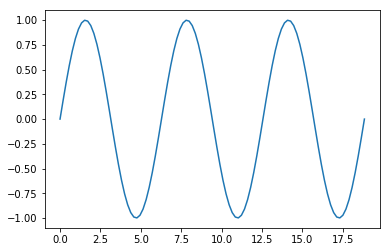

train_idx: [ 2 59 73 95 84 57 47 28 45  3]


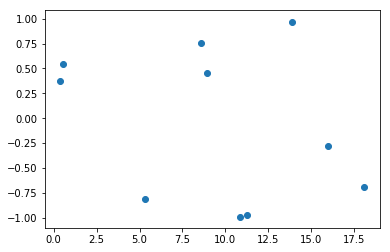

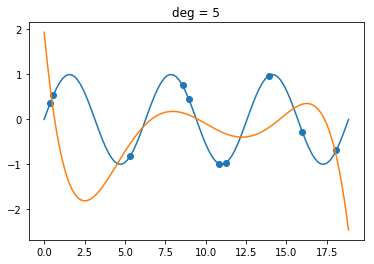

train_idx: [91 43 88 42 98 19 20 76 66 70]


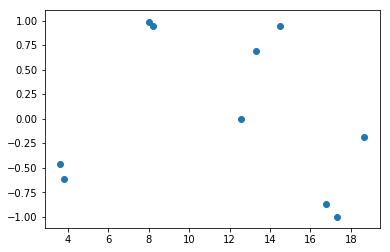

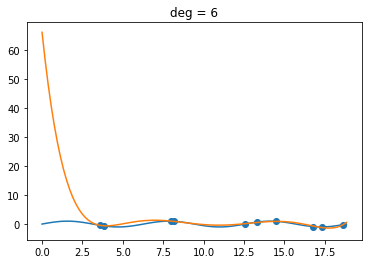

train_idx: [20 45 41 59 61 61 58 53 30 37]


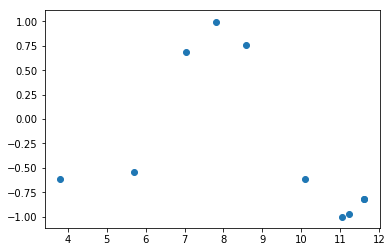

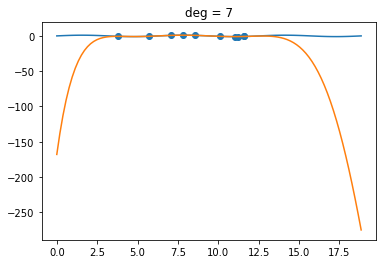

train_idx: [17 15  4 67  5 18 54 54 64 65]


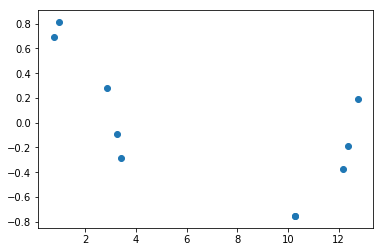

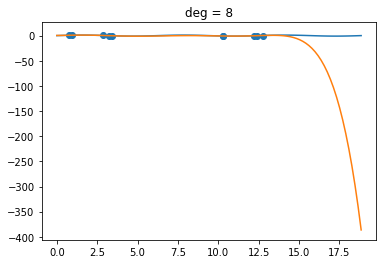

train_idx: [14  7  4 24 58 89 15 87 12 64]


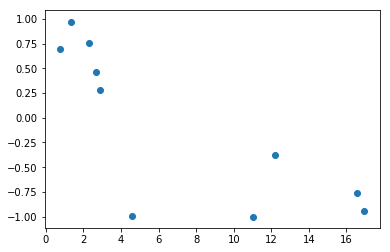

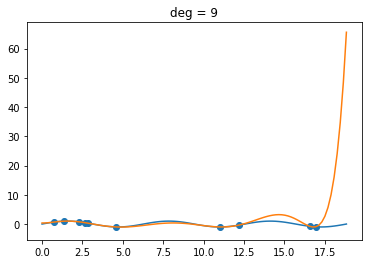

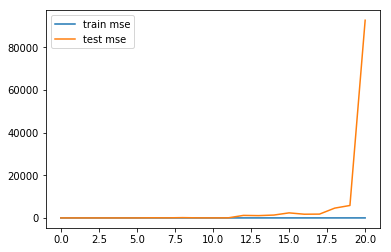

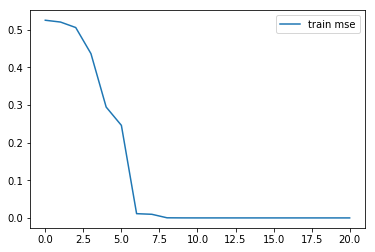

In [3]:
# notes for this course can be found at:
# https://deeplearningcourses.com/c/data-science-linear-regression-in-python
# https://www.udemy.com/data-science-linear-regression-in-python

from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future


import numpy as np
import matplotlib.pyplot as plt


def make_poly(X, deg):
    n = len(X)
    data = [np.ones(n)]
    for d in range(deg):
        data.append(X**(d+1))
    return np.vstack(data).T


def fit(X, Y):
    return np.linalg.solve(X.T.dot(X), X.T.dot(Y))


def fit_and_display(X, Y, sample, deg):
    N = len(X)
    train_idx = np.random.choice(N, sample)
    print('train_idx:', train_idx)
    Xtrain = X[train_idx]
    Ytrain = Y[train_idx]

    plt.scatter(Xtrain, Ytrain)
    plt.show()

    # fit polynomial
    Xtrain_poly = make_poly(Xtrain, deg)    
    w = fit(Xtrain_poly, Ytrain)

    # display the polynomial
    X_poly = make_poly(X, deg)
    Y_hat = X_poly.dot(w)
    plt.plot(X, Y)
    plt.plot(X, Y_hat)
    plt.scatter(Xtrain, Ytrain)
    plt.title("deg = %d" % deg)
    plt.show()


def get_mse(Y, Yhat):
    d = Y - Yhat
    return d.dot(d) / len(d)


def plot_train_vs_test_curves(X, Y, sample=20, max_deg=20):
    N = len(X)
    train_idx = np.random.choice(N, sample)
    Xtrain = X[train_idx]
    Ytrain = Y[train_idx]

    test_idx = [idx for idx in range(N) if idx not in train_idx]
    # test_idx = np.random.choice(N, sample)
    Xtest = X[test_idx]
    Ytest = Y[test_idx]

    mse_trains = []
    mse_tests = []
    for deg in range(max_deg+1):
        Xtrain_poly = make_poly(Xtrain, deg)
        w = fit(Xtrain_poly, Ytrain)
        Yhat_train = Xtrain_poly.dot(w)
        mse_train = get_mse(Ytrain, Yhat_train)

        Xtest_poly = make_poly(Xtest, deg)
        Yhat_test = Xtest_poly.dot(w)
        mse_test = get_mse(Ytest, Yhat_test)

        mse_trains.append(mse_train)
        mse_tests.append(mse_test)

    plt.plot(mse_trains, label="train mse")
    plt.plot(mse_tests, label="test mse")
    plt.legend()
    plt.show()

    plt.plot(mse_trains, label="train mse")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    # make up some data and plot it
    N = 100
    X = np.linspace(0, 6*np.pi, N)
    Y = np.sin(X)

    plt.plot(X, Y)
    plt.show()

    for deg in (5, 6, 7, 8, 9):
        fit_and_display(X, Y, 10, deg)
    plot_train_vs_test_curves(X, Y)
